In [88]:
from data import read_user, read_values_and_situations
from pairwise_comparison import PairwiseComparison
import numpy as np
import matplotlib.pyplot as plt

In [89]:
values, values_name_only, situation_list = read_values_and_situations("data/values.csv", "data/situations.csv")
users = read_user("data/results.csv")
for user in users:
    user.set_choices_responses()
    user.set_sliders_responses()
print(len(users))

10


In [90]:
pcm_r_mean = np.zeros((len(values),len(values)))
pcm_p_mean = np.zeros((len(values),len(values)))
mean_sliders_responses = np.zeros(6)
errors = np.zeros(len(users))
sup_5 = np.zeros(len(users))
sup_10 = np.zeros(len(users))

In [91]:
def process_user(user_number):
    w = np.zeros(len(situation_list))
    for i in range(len(situation_list)):
        w[i] = (0.5-0.4*users[user_number].difficulties[i])
    pcm = PairwiseComparison(values)
    pcm_r = pcm.get_raw(situation_list,users[user_number].choices)
    pcm_p = pcm.get_probability(situation_list, users[user_number].choices,w)
    eigenvalues_p, eigenvectors_p = np.linalg.eig(pcm_p)
    principal_eigenvector_p = np.abs(eigenvectors_p[:, 0])
    eigen_scores_p = principal_eigenvector_p / np.sum(principal_eigenvector_p)

    pairwise_vs_sliders = np.zeros(len(values))
    for i in range(len(values)):
        pairwise_vs_sliders[i] = eigen_scores_p[i] - users[user_number].sliders_responses[i]

    for i in range(len(mean_sliders_responses)):
        mean_sliders_responses[i] += users[user_number].sliders_responses[i]

    for i in range(len(values)):
        for j in range(len(values)):
            pcm_r_mean[i][j] += pcm_r[i][j]
            pcm_p_mean[i][j] += pcm_p[i][j]

    errors[user_number] = np.sum(np.abs(pairwise_vs_sliders))

    nb_sup5 = 0
    nb_sup10 = 0
    for i in range(len(pairwise_vs_sliders)):
        if np.abs(pairwise_vs_sliders[i]) > 0.05 : nb_sup5 += 1
        if np.abs(pairwise_vs_sliders[i]) > 0.1 : nb_sup10 += 1

    sup_5[user_number] = nb_sup5
    sup_10[user_number] = nb_sup10

    print(values_name_only)
    print(pcm_r)
    print("############################")
    print(values_name_only)
    print(pcm_p)
    print("############################")
    plt.figure(figsize = (15, 4))
    plt.title("Résultats de la pairwise comparison")
    plt.bar(values_name_only, eigen_scores_p)
    plt.show()
    plt.figure(figsize = (15, 4))
    plt.title("Résultats des évaluations directes des valeurs")
    plt.bar(values_name_only, users[user_number].sliders_responses, color="green")
    plt.show()
    plt.figure(figsize = (15, 4))
    plt.title("Différence entre pairwise comparison et évaluation directe")
    plt.bar(values_name_only, pairwise_vs_sliders, color="red")
    plt.show()
    print(f"Somme des erreurs : {errors[user_number]}")
    print(f"Nombre d'erreurs supérieures à 0.05 : {nb_sup5}")
    print(f"    Dont supérieures à 0.1 : {nb_sup10}")
    
    
def process_global():
    mean_error = np.mean(errors)
    mean_sup_5 = np.mean(sup_5)
    mean_sup_10 = np.mean(sup_10)
    for i in range(len(values)):
        for j in range(len(values)):
            pcm_r_mean[i][j] /= len(users)
            pcm_p_mean[i][j] /= len(users)
    for i in range(len(mean_sliders_responses)):
        mean_sliders_responses[i] /= len(users)
    eigenvalues_p_mean, eigenvectors_p_mean = np.linalg.eig(pcm_p_mean)
    principal_eigenvector_p_mean = np.abs(eigenvectors_p_mean[:, 0])
    eigen_scores_p_mean = principal_eigenvector_p_mean / np.sum(principal_eigenvector_p_mean)

    pairwise_vs_sliders_mean = np.zeros(len(values))
    for i in range(len(values)):
        pairwise_vs_sliders_mean[i] = eigen_scores_p_mean[i] - mean_sliders_responses[i]

    nb_sup5 = 0
    nb_sup10 = 0
    for i in range(len(pairwise_vs_sliders_mean)):
        if np.abs(pairwise_vs_sliders_mean[i]) > 0.05 : nb_sup5 += 1
        if np.abs(pairwise_vs_sliders_mean[i]) > 0.1 : nb_sup10 += 1

    print(values_name_only)
    print(pcm_r_mean)
    print("############################")
    print(values_name_only)
    print(pcm_p_mean)
    print("############################")
    plt.figure(figsize = (15, 4))
    plt.title("Moyenne des résultats de la pairwise comparison")
    plt.bar(values_name_only, eigen_scores_p_mean)
    plt.show()
    plt.figure(figsize = (16, 4))
    plt.title("Moyenne des évaluations directes des valeurs")
    plt.bar(values_name_only, mean_sliders_responses, color="green")
    plt.show()
    plt.figure(figsize = (16, 4))
    plt.title("Différence moyenne entre pairwise comparison et évaluation directe")
    plt.bar(values_name_only, pairwise_vs_sliders_mean, color="red")
    plt.show()
    print(f"Erreur globale : {np.sum(np.abs(pairwise_vs_sliders_mean))}")
    print(f"Erreur moyenne : {mean_error}")
    print(f"Nombre d'erreurs supérieures à 0.05 : {nb_sup5}, en moyenne : {mean_sup_5}")
    print(f"    Dont supérieures à 0.1 : {nb_sup10}, en moyenne : {mean_sup_10}")

In [92]:
#Ajouter calcul de consistance pour chaque user
#Lire l'article eigenvector

['Inclusiveness', 'Environmental sustainability', 'Privacy', 'Security of supply', 'Well-being', 'Affordability']
[[1. 0. 1. 1. 1. 0.]
 [1. 1. 1. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0.]
 [0. 1. 1. 1. 1. 1.]
 [0. 1. 1. 0. 1. 0.]
 [1. 0. 1. 0. 1. 1.]]
############################
['Inclusiveness', 'Environmental sustainability', 'Privacy', 'Security of supply', 'Well-being', 'Affordability']
[[1.  0.3 0.7 0.9 0.9 0.2]
 [0.7 1.  0.8 0.3 0.2 0.6]
 [0.3 0.2 1.  0.3 0.2 0.3]
 [0.1 0.7 0.7 1.  0.7 0.8]
 [0.1 0.8 0.8 0.3 1.  0.3]
 [0.8 0.4 0.7 0.2 0.7 1. ]]
############################


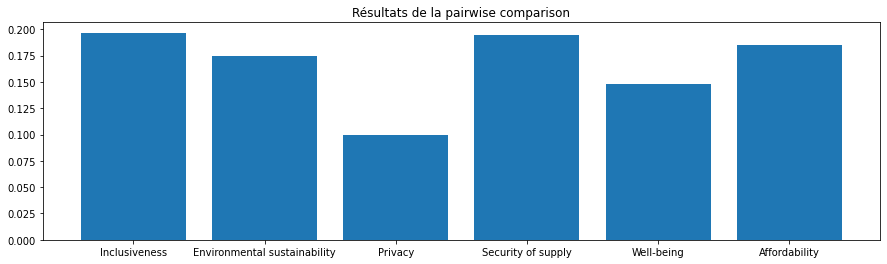

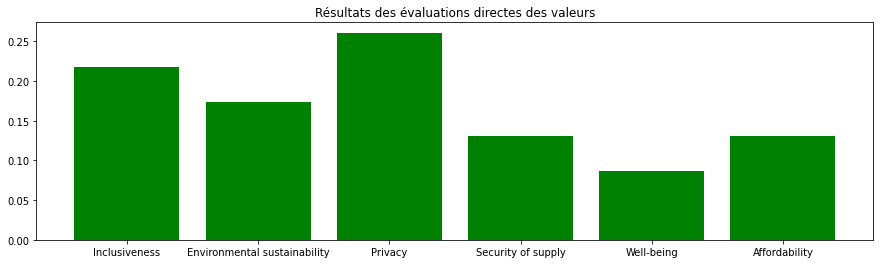

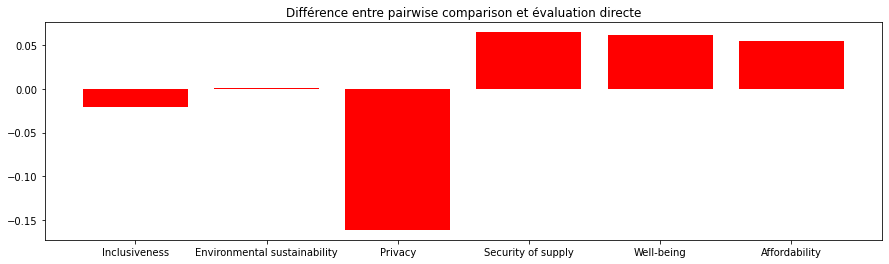

Somme des erreurs : 0.36329316514442356
Nombre d'erreurs supérieures à 0.05 : 4
    Dont supérieures à 0.1 : 1


In [93]:
process_user(0)

['Inclusiveness', 'Environmental sustainability', 'Privacy', 'Security of supply', 'Well-being', 'Affordability']
[[1. 1. 1. 0. 1. 1.]
 [0. 1. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 1.]
 [1. 1. 1. 1. 0. 1.]
 [0. 1. 1. 1. 1. 1.]
 [0. 1. 0. 0. 0. 1.]]
############################
['Inclusiveness', 'Environmental sustainability', 'Privacy', 'Security of supply', 'Well-being', 'Affordability']
[[1.  0.7 0.8 0.3 0.6 0.6]
 [0.3 1.  0.9 0.1 0.2 0.3]
 [0.2 0.1 1.  0.2 0.1 1. ]
 [0.7 0.9 0.8 1.  0.2 0.8]
 [0.4 0.8 0.9 0.8 1.  0.9]
 [0.4 0.7 0.  0.2 0.1 1. ]]
############################


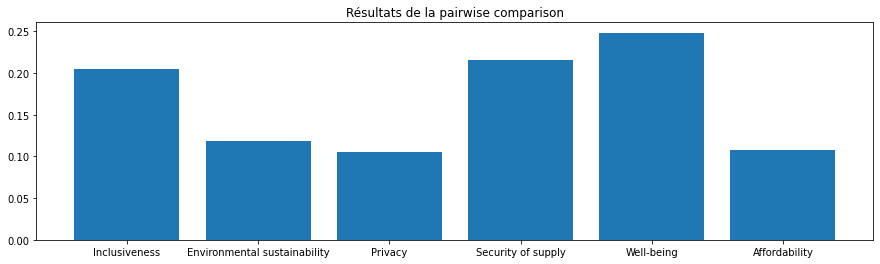

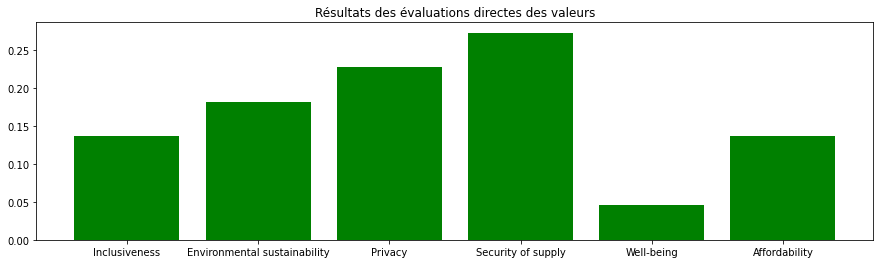

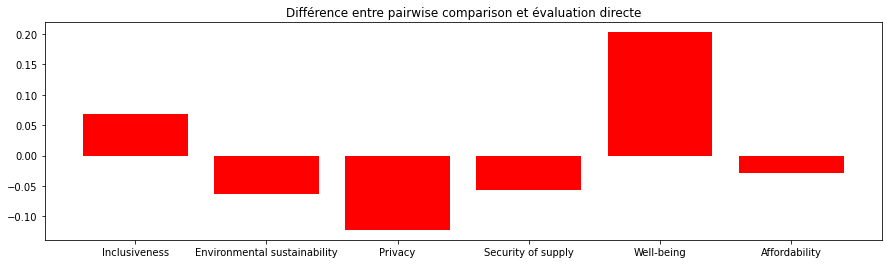

Somme des erreurs : 0.542525135013581
Nombre d'erreurs supérieures à 0.05 : 5
    Dont supérieures à 0.1 : 2


In [94]:
process_user(1)

['Inclusiveness', 'Environmental sustainability', 'Privacy', 'Security of supply', 'Well-being', 'Affordability']
[[1. 1. 1. 1. 1. 1.]
 [0. 1. 1. 1. 1. 0.]
 [0. 0. 1. 0. 0. 1.]
 [0. 0. 1. 1. 1. 0.]
 [0. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 1. 1.]]
############################
['Inclusiveness', 'Environmental sustainability', 'Privacy', 'Security of supply', 'Well-being', 'Affordability']
[[1.  0.8 0.9 0.9 0.9 0.7]
 [0.2 1.  0.9 1.  0.9 0.4]
 [0.1 0.1 1.  0.1 0.1 0.8]
 [0.1 0.  0.9 1.  1.  0.1]
 [0.1 0.1 0.9 0.  1.  0.1]
 [0.3 0.6 0.2 0.9 0.9 1. ]]
############################


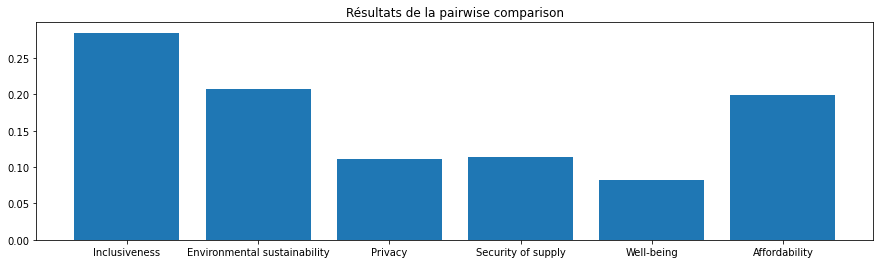

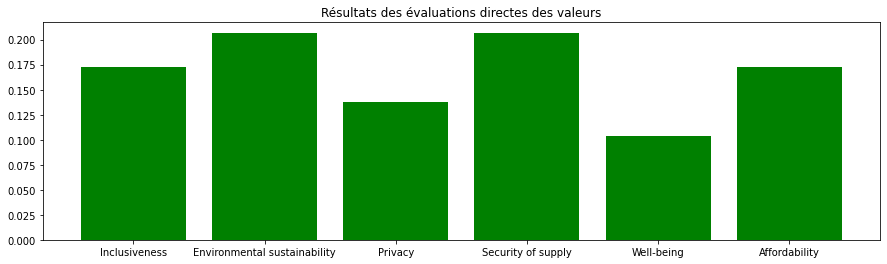

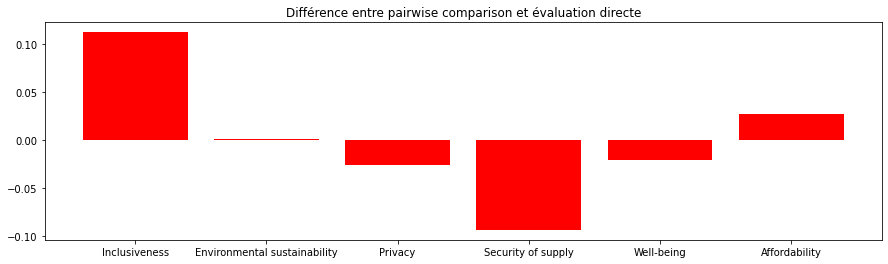

Somme des erreurs : 0.28090096833345846
Nombre d'erreurs supérieures à 0.05 : 2
    Dont supérieures à 0.1 : 1


In [95]:
process_user(2)

['Inclusiveness', 'Environmental sustainability', 'Privacy', 'Security of supply', 'Well-being', 'Affordability']
[[1. 0. 0. 1. 0. 0.]
 [1. 1. 0. 1. 1. 1.]
 [1. 1. 1. 1. 1. 0.]
 [0. 0. 0. 1. 1. 0.]
 [1. 0. 0. 0. 1. 1.]
 [1. 0. 1. 1. 0. 1.]]
############################
['Inclusiveness', 'Environmental sustainability', 'Privacy', 'Security of supply', 'Well-being', 'Affordability']
[[1.  0.3 0.1 0.7 0.4 0.3]
 [0.7 1.  0.3 0.8 0.7 0.9]
 [0.9 0.7 1.  0.6 1.  0.1]
 [0.3 0.2 0.4 1.  0.7 0. ]
 [0.6 0.3 0.  0.3 1.  0.7]
 [0.7 0.1 0.9 1.  0.3 1. ]]
############################


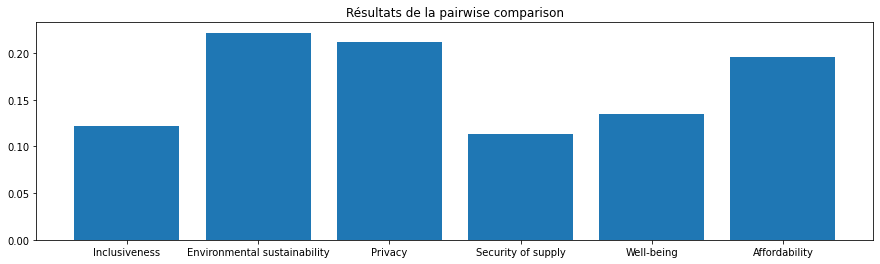

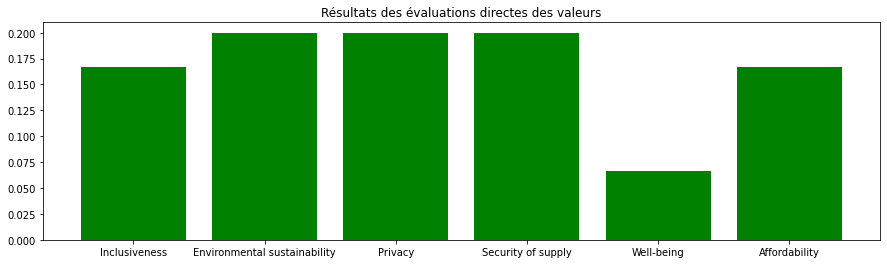

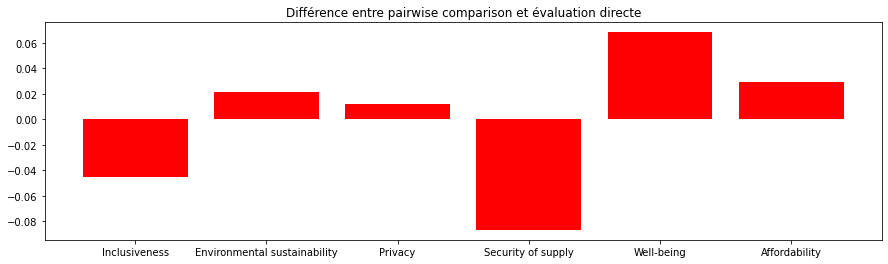

Somme des erreurs : 0.26380892291950764
Nombre d'erreurs supérieures à 0.05 : 2
    Dont supérieures à 0.1 : 0


In [96]:
process_user(3)

['Inclusiveness', 'Environmental sustainability', 'Privacy', 'Security of supply', 'Well-being', 'Affordability']
[[1. 0. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1.]
 [0. 0. 1. 0. 0. 1.]
 [0. 0. 1. 1. 1. 0.]
 [0. 0. 1. 0. 1. 0.]
 [0. 0. 0. 1. 1. 1.]]
############################
['Inclusiveness', 'Environmental sustainability', 'Privacy', 'Security of supply', 'Well-being', 'Affordability']
[[1.  0.4 1.  1.  0.8 1. ]
 [0.6 1.  0.9 1.  0.9 0.7]
 [0.  0.1 1.  0.  0.1 0.6]
 [0.  0.  1.  1.  1.  0. ]
 [0.2 0.1 0.9 0.  1.  0. ]
 [0.  0.3 0.4 1.  1.  1. ]]
############################


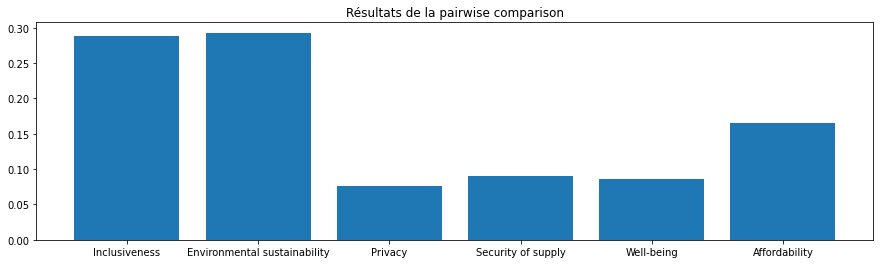

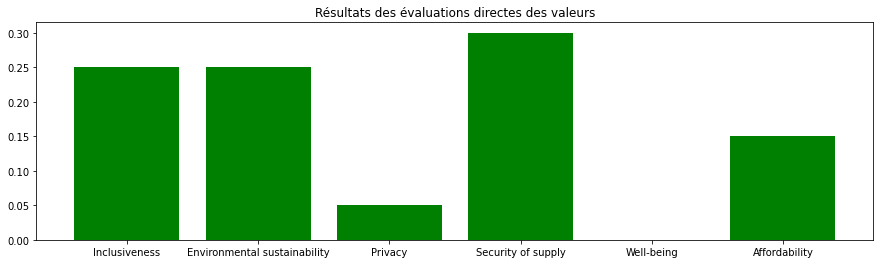

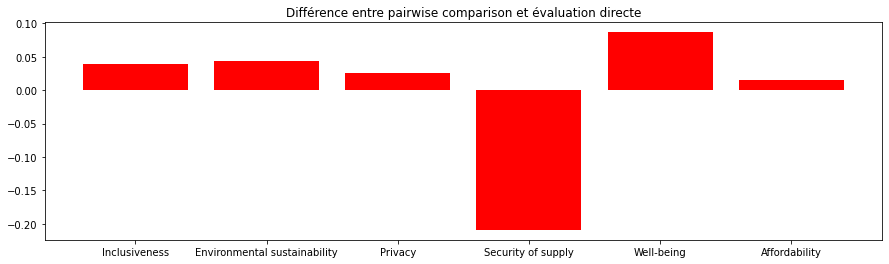

Somme des erreurs : 0.4185235184285515
Nombre d'erreurs supérieures à 0.05 : 2
    Dont supérieures à 0.1 : 1


In [97]:
process_user(4)

['Inclusiveness', 'Environmental sustainability', 'Privacy', 'Security of supply', 'Well-being', 'Affordability']
[[1. 1. 1. 1. 1. 1.]
 [0. 1. 1. 1. 1. 0.]
 [0. 0. 1. 0. 0. 1.]
 [0. 0. 1. 1. 1. 1.]
 [0. 0. 1. 0. 1. 0.]
 [0. 1. 0. 0. 1. 1.]]
############################
['Inclusiveness', 'Environmental sustainability', 'Privacy', 'Security of supply', 'Well-being', 'Affordability']
[[1.  0.9 0.7 0.7 0.9 0.7]
 [0.1 1.  0.7 1.  0.7 0.3]
 [0.3 0.3 1.  0.4 0.4 0.6]
 [0.3 0.  0.6 1.  0.9 0.8]
 [0.1 0.3 0.6 0.1 1.  0. ]
 [0.3 0.7 0.4 0.2 1.  1. ]]
############################


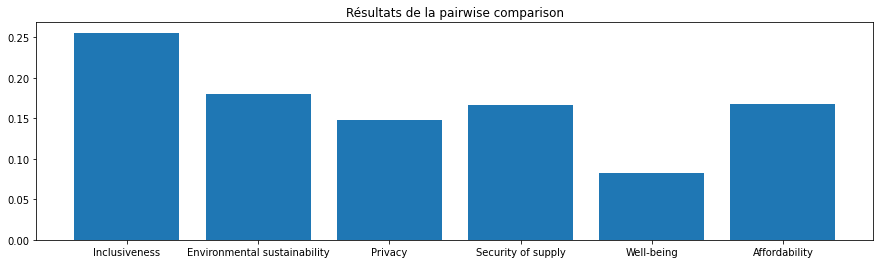

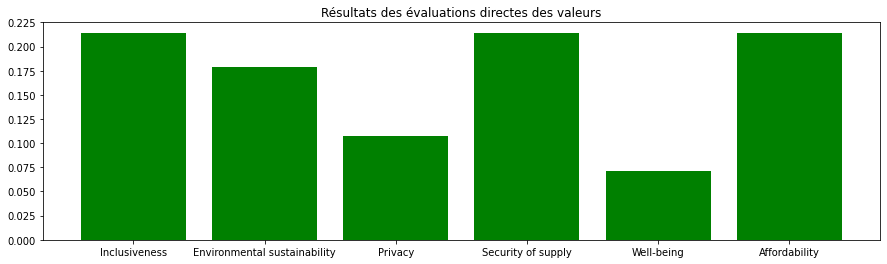

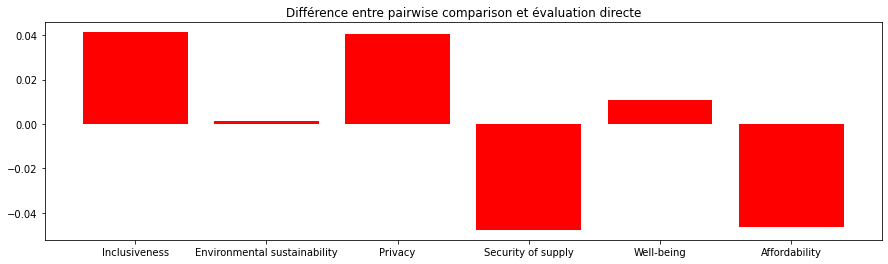

Somme des erreurs : 0.18772934612199196
Nombre d'erreurs supérieures à 0.05 : 0
    Dont supérieures à 0.1 : 0


In [98]:
process_user(5)

['Inclusiveness', 'Environmental sustainability', 'Privacy', 'Security of supply', 'Well-being', 'Affordability']
[[1. 1. 1. 1. 1. 1.]
 [0. 1. 1. 0. 1. 0.]
 [0. 0. 1. 0. 0. 1.]
 [0. 1. 1. 1. 1. 0.]
 [0. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 1. 1.]]
############################
['Inclusiveness', 'Environmental sustainability', 'Privacy', 'Security of supply', 'Well-being', 'Affordability']
[[1.  0.7 0.9 1.  0.6 0.9]
 [0.3 1.  0.9 0.3 0.7 0.3]
 [0.1 0.1 1.  0.1 0.1 0.9]
 [0.  0.7 0.9 1.  0.9 0.2]
 [0.4 0.3 0.9 0.1 1.  0.1]
 [0.1 0.7 0.1 0.8 0.9 1. ]]
############################


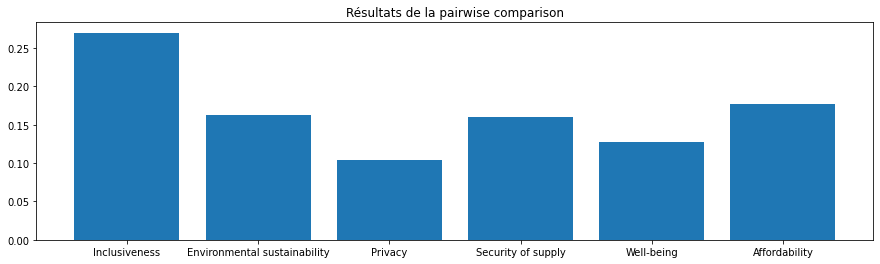

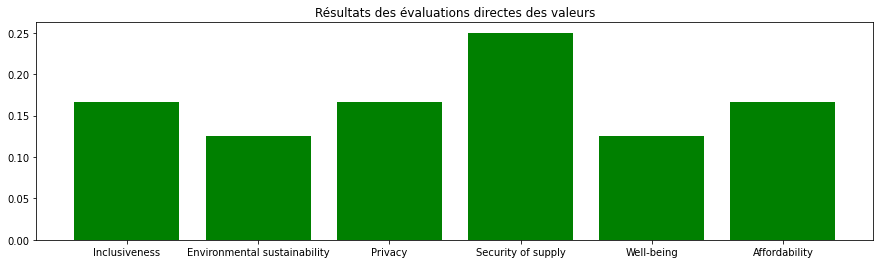

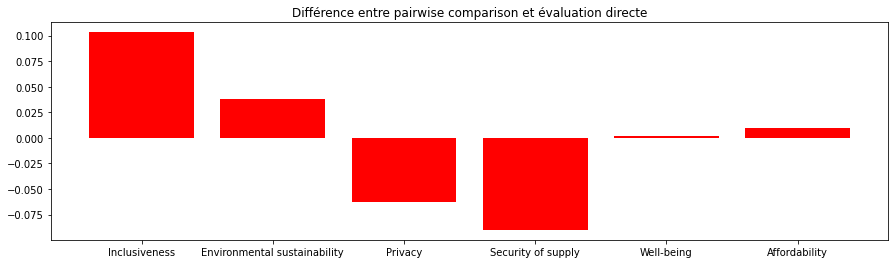

Somme des erreurs : 0.3065322734644305
Nombre d'erreurs supérieures à 0.05 : 3
    Dont supérieures à 0.1 : 1


In [99]:
process_user(6)

['Inclusiveness', 'Environmental sustainability', 'Privacy', 'Security of supply', 'Well-being', 'Affordability']
[[1. 0. 0. 1. 0. 0.]
 [1. 1. 0. 0. 0. 1.]
 [1. 1. 1. 0. 1. 0.]
 [0. 1. 1. 1. 1. 0.]
 [1. 1. 0. 0. 1. 0.]
 [1. 0. 1. 1. 1. 1.]]
############################
['Inclusiveness', 'Environmental sustainability', 'Privacy', 'Security of supply', 'Well-being', 'Affordability']
[[1.  0.4 0.4 0.8 0.3 0.1]
 [0.6 1.  0.3 0.  0.3 0.7]
 [0.6 0.7 1.  0.4 0.7 0.1]
 [0.2 1.  0.6 1.  1.  0.1]
 [0.7 0.7 0.3 0.  1.  0.1]
 [0.9 0.3 0.9 0.9 0.9 1. ]]
############################


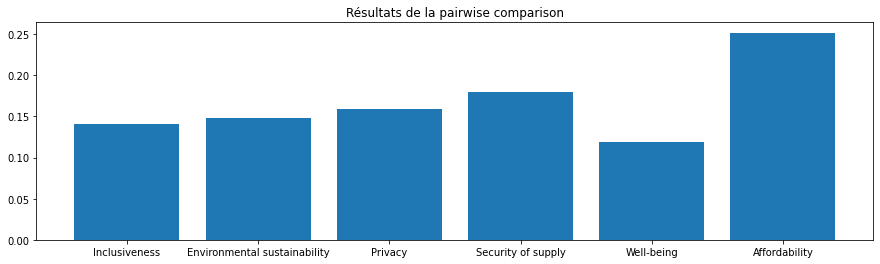

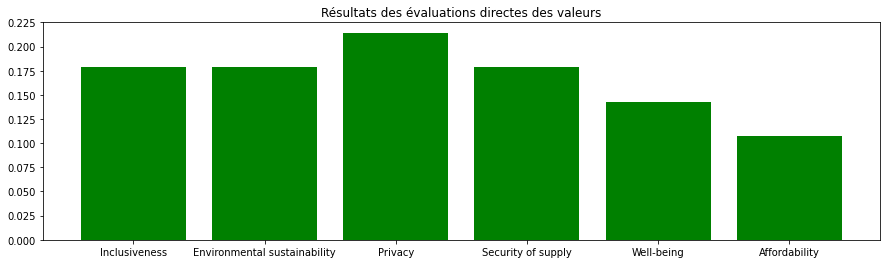

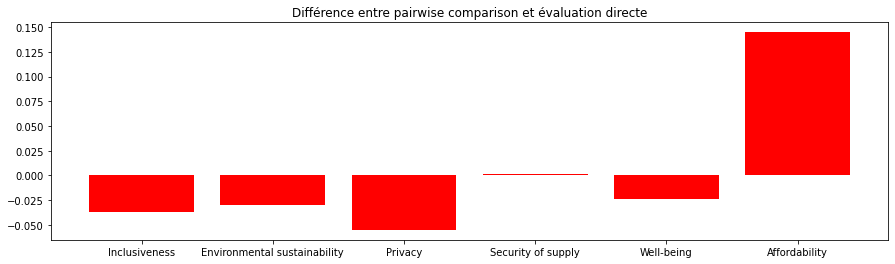

Somme des erreurs : 0.29184510226986377
Nombre d'erreurs supérieures à 0.05 : 2
    Dont supérieures à 0.1 : 1


In [100]:
process_user(7)

['Inclusiveness', 'Environmental sustainability', 'Privacy', 'Security of supply', 'Well-being', 'Affordability']
[[1. 1. 1. 1. 1. 1.]
 [0. 1. 1. 1. 1. 1.]
 [0. 0. 1. 0. 0. 1.]
 [0. 0. 1. 1. 1. 0.]
 [0. 0. 1. 0. 1. 0.]
 [0. 0. 0. 1. 1. 1.]]
############################
['Inclusiveness', 'Environmental sustainability', 'Privacy', 'Security of supply', 'Well-being', 'Affordability']
[[1.  0.8 1.  0.9 0.8 1. ]
 [0.2 1.  1.  0.9 0.9 1. ]
 [0.  0.  1.  0.  0.  1. ]
 [0.1 0.1 1.  1.  1.  0.1]
 [0.2 0.1 1.  0.  1.  0.1]
 [0.  0.  0.  0.9 0.9 1. ]]
############################


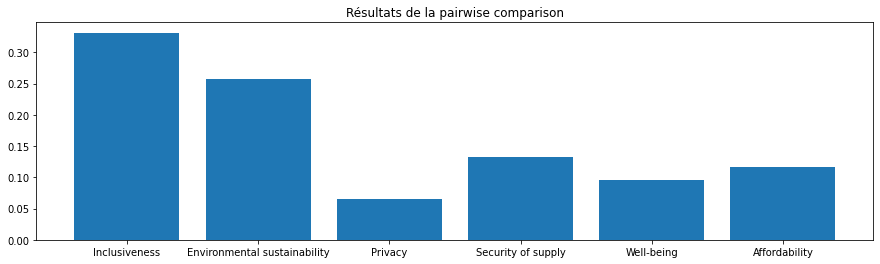

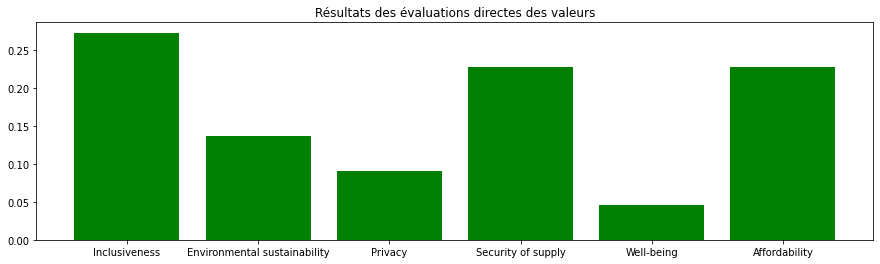

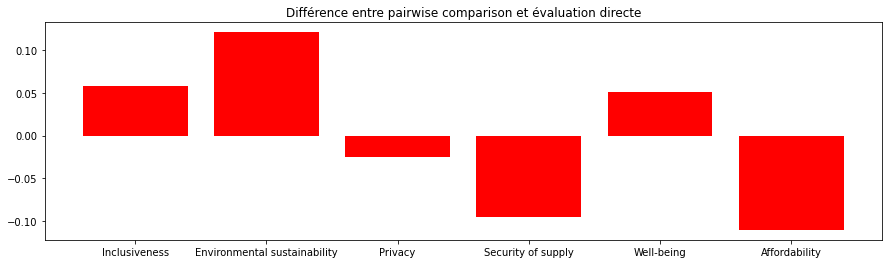

Somme des erreurs : 0.4616258762922191
Nombre d'erreurs supérieures à 0.05 : 5
    Dont supérieures à 0.1 : 2


In [101]:
process_user(8)

['Inclusiveness', 'Environmental sustainability', 'Privacy', 'Security of supply', 'Well-being', 'Affordability']
[[1. 1. 1. 1. 0. 0.]
 [0. 1. 1. 1. 0. 0.]
 [0. 0. 1. 0. 0. 1.]
 [0. 0. 1. 1. 1. 1.]
 [1. 1. 1. 0. 1. 1.]
 [1. 1. 0. 0. 0. 1.]]
############################
['Inclusiveness', 'Environmental sustainability', 'Privacy', 'Security of supply', 'Well-being', 'Affordability']
[[1.  0.8 0.9 0.8 0.2 0.2]
 [0.2 1.  0.9 0.9 0.1 0.2]
 [0.1 0.1 1.  0.1 0.1 1. ]
 [0.2 0.1 0.9 1.  0.9 0.8]
 [0.8 0.9 0.9 0.1 1.  0.9]
 [0.8 0.8 0.  0.2 0.1 1. ]]
############################


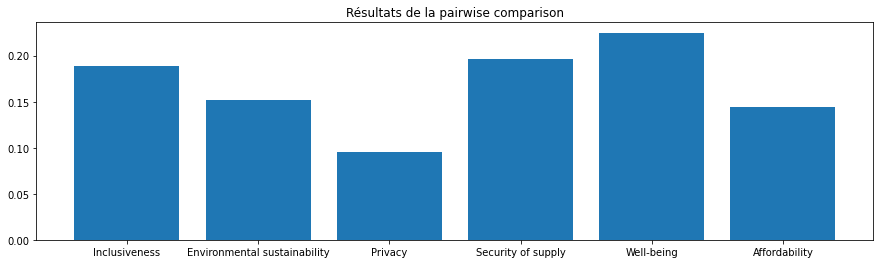

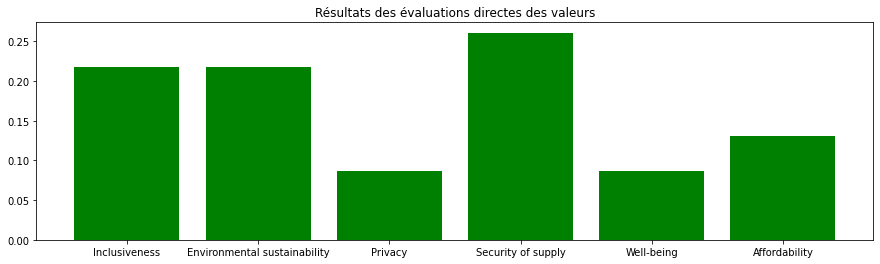

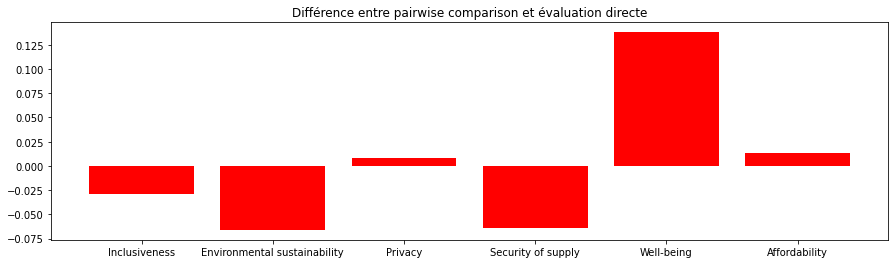

Somme des erreurs : 0.3184919353602875
Nombre d'erreurs supérieures à 0.05 : 3
    Dont supérieures à 0.1 : 1


In [102]:
process_user(9)

['Inclusiveness', 'Environmental sustainability', 'Privacy', 'Security of supply', 'Well-being', 'Affordability']
[[1.  0.6 0.8 0.9 0.7 0.6]
 [0.4 1.  0.8 0.6 0.6 0.5]
 [0.2 0.2 1.  0.1 0.2 0.7]
 [0.1 0.4 0.9 1.  0.9 0.4]
 [0.3 0.4 0.8 0.1 1.  0.3]
 [0.4 0.5 0.3 0.6 0.7 1. ]]
############################
['Inclusiveness', 'Environmental sustainability', 'Privacy', 'Security of supply', 'Well-being', 'Affordability']
[[1.   0.61 0.74 0.8  0.64 0.57]
 [0.39 1.   0.76 0.63 0.56 0.54]
 [0.26 0.24 1.   0.22 0.28 0.64]
 [0.2  0.37 0.78 1.   0.83 0.37]
 [0.36 0.44 0.72 0.17 1.   0.32]
 [0.43 0.46 0.36 0.63 0.68 1.  ]]
############################


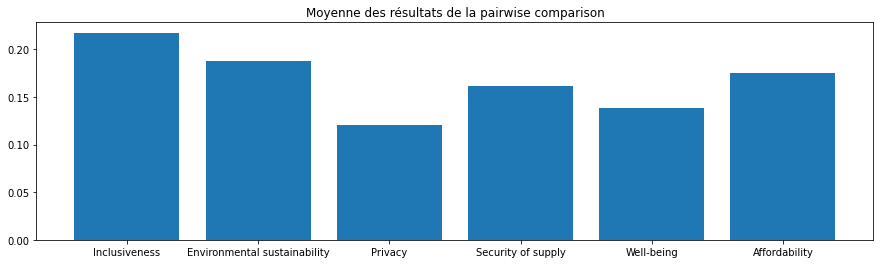

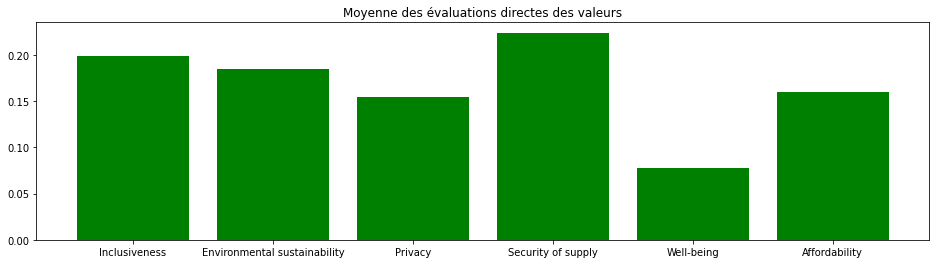

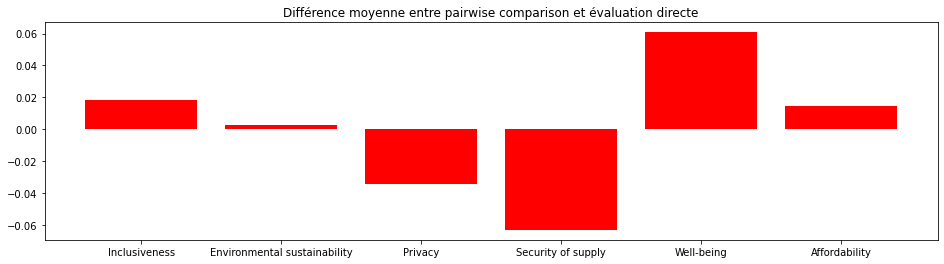

Erreur globale : 0.1935880392752786
Erreur moyenne : 0.34352762433483147
Nombre d'erreurs supérieures à 0.05 : 2, en moyenne : 2.8
    Dont supérieures à 0.1 : 0, en moyenne : 1.0


In [103]:
process_global()